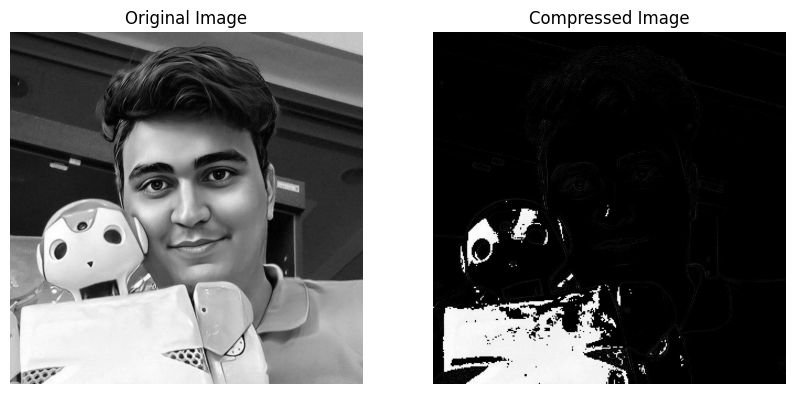

Compression Ratio: 0.02


In [24]:
import cv2 
import pywt
import numpy as np
import matplotlib.pyplot as plt

def compress_coeff(coeff, num_coeffs_to_retain):
    # Flatten coefficients
    flat_coeff = coeff.flatten()

    # Sort coefficients by magnitude    
    sorted_coeff = np.argsort(np.abs(flat_coeff))[::-1]

    # Create an array to store selected coefficients
    selected_coeff = np.zeros_like(flat_coeff)

    # Retain specified number of coefficients
    selected_coeff[sorted_coeff[:num_coeffs_to_retain]] = flat_coeff[sorted_coeff[:num_coeffs_to_retain]]

    # Reshape back to original shape
    compressed_coeff = selected_coeff.reshape(coeff.shape)

    return compressed_coeff

def compress_image_wavelet(image, num_coeffs_to_retain):
    # Apply 2D wavelet transform
    cA, (cH, cV, cD) = pywt.dwt2(image, 'bior1.3')

    # Compress each coefficient array
    cA_compressed = compress_coeff(cA, num_coeffs_to_retain)
    cH_compressed = compress_coeff(cH, num_coeffs_to_retain)
    cV_compressed = compress_coeff(cV, num_coeffs_to_retain)
    cD_compressed = compress_coeff(cD, num_coeffs_to_retain)

    # Reconstruction
    compressed_image = pywt.idwt2((cA_compressed, (cH_compressed, cV_compressed, cD_compressed)), 'bior1.3')

    # Clip values to valid range
    compressed_image = np.clip(compressed_image, 0, 255).astype(np.uint8)

    return compressed_image

def calculate_compression_ratio(original_size, num_coeffs_retained):
    return num_coeffs_retained / original_size

def main():
    input_image_path = 'test.jpg'
    output_image_path = 'compressed_image.jpg'
    num_coeffs_to_retain = 10000  # Adjust this value to control compression level

    # Load the image
    image = cv2.imread(input_image_path, cv2.IMREAD_GRAYSCALE)

    if image is not None:
        try:
            # Compress the image using wavelet transform
            compressed_image = compress_image_wavelet(image, num_coeffs_to_retain)

            # Save the compressed image
            cv2.imwrite(output_image_path, compressed_image)

            # Display the original and compressed images
            plt.figure(figsize=(10, 5))

            plt.subplot(1, 2, 1)
            plt.imshow(image, cmap='gray')
            plt.title('Original Image')
            plt.axis('off')

            plt.subplot(1, 2, 2)
            plt.imshow(compressed_image, cmap='gray')
            plt.title('Compressed Image')
            plt.axis('off')

            plt.show()

            # Calculate and print the compression ratio
            original_size = image.size
            compression_ratio = calculate_compression_ratio(original_size, num_coeffs_to_retain)
            print(f"Compression Ratio: {compression_ratio:.2f}")

        except Exception as e:
            print(f"Error: {e}")
    else:
        print("Error: Failed to load the input image.")

if __name__ == "__main__":
    main()